# Preparing Time Series Data
Like most preparation processes, but now with dates!

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from env import user, password, host
import os
import acquire as a
import prepare as p

#warnings
from acquire import wrangle_store_data
import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
def get_db_url(database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

def get_store_data():
    '''
    Returns a dataframe of all store data in the tsa_item_demand database and saves a local copy as a csv file.
    '''
    query = '''
    SELECT *
    FROM items
    JOIN sales USING(item_id)
    JOIN stores USING(store_id) 
    '''
    
    df = pd.read_sql(query, get_db_url('tsa_item_demand'))
    
    df.to_csv('tsa_item_demand.csv', index=False)
    
    return df

def wrangle_store_data():
    filename = 'tsa_store_data.csv'
    
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    else:
        df = get_store_data()
        
    return df

# Exercises
The end result of this exercise should be a file named `prepare.py`.

**Using your store items data:**

- Convert date column to datetime format.
- Plot the distribution of sale_amount and item_price.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

**Using OPS data (hint: if you don't know how to acquire this data, do a bit of google searching on how to do this with pandas):**
- Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

### 1. Convert date column to datetime format.

In [4]:
#Get clean data
df = wrangle_store_data()

In [5]:
df.head(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [10]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

# Set the index as that date and then sort index (by the date)
df = df.set_index("sale_date").sort_index()

### 2. Plot the distribution of sale_amount and item_price.

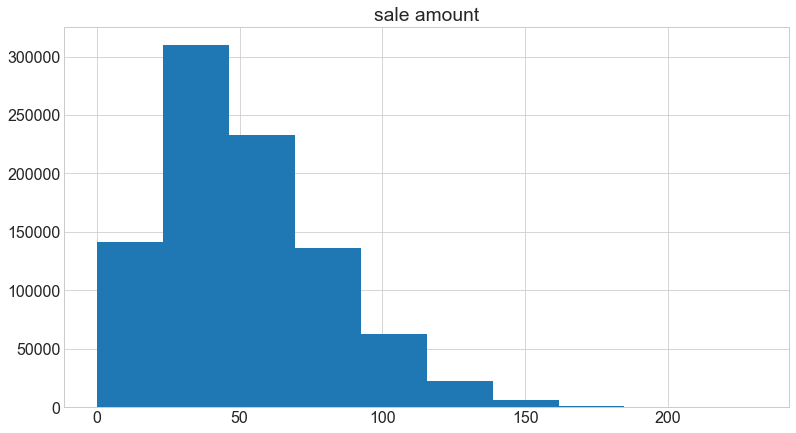

In [16]:
#plot sale amount
df.sale_amount.hist()
plt.title('sale amount')
plt.show()

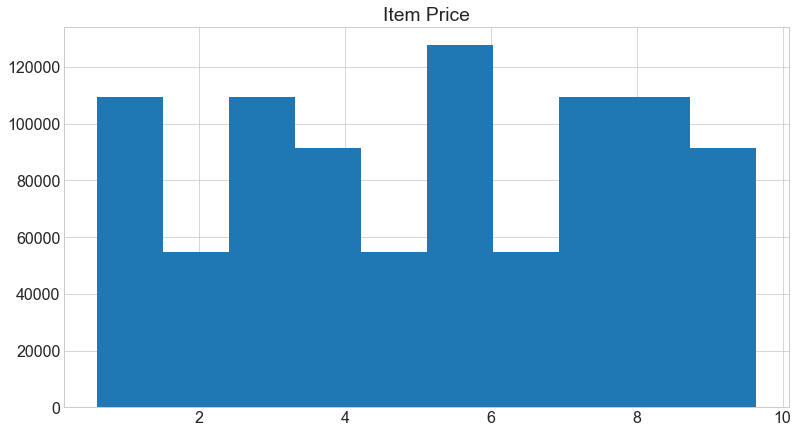

In [15]:
#plot item price
df.item_price.hist()
plt.title('Item Price')
plt.show()

### 3. Set the index to be the datetime variable.

In [17]:
#Done above

### 4. Add a 'month' and 'day of week' column to your dataframe.

In [18]:
#Adding month column
df['month'] = df.index.month_name()

In [19]:
df.head(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month
sale_date,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January


In [24]:
#Adding week column
df['day_of_week'] = df.index.day_name()

In [25]:
df.head(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [27]:
df['sales_total'] = df['item_price'] * df['sale_amount']

In [28]:
df.head(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [30]:
def prepare_sales(df):
    # Reassign the sale_date column to be a datetime type
    df.sale_date = pd.to_datetime(df.sale_date)

    # Set the index as that date and then sort index (by the date)
    df = df.set_index("sale_date").sort_index()
    
    #Adding month column
    df['month'] = df.index.month_name()
    
    #Adding week column
    df['day_of_week'] = df.index.day_name()
    
    #Adding sales total column
    df['sales_total'] = df['item_price'] * df['sale_amount']
    
    return df

In [31]:
#Get clean data to test the function
df = wrangle_store_data()

In [32]:
df = prepare_sales(df)

In [33]:
df.head(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16


### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [5]:
def get_power_data():
    filename = 'power_systems.csv'
    if os.path.isfile(filename):
        return pd.read_csv(filename).iloc[:,1:]
    else:
        url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
        df = pd.read_csv(url)
        df = pd.DataFrame(df)
        df.to_csv(filename)
        
    return df

In [2]:
df = a.get_power_data()

In [3]:
df.head(2)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN


### 1. Convert date column to datetime format.

In [41]:
# Reassign the date column to be a datetime type
df.Date = pd.to_datetime(df.Date)

# Set the index as that date and then sort index (by the date)
df = df.set_index("Date").sort_index()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


### 2. Plot the distribution of each of your variables.

Column: Consumption


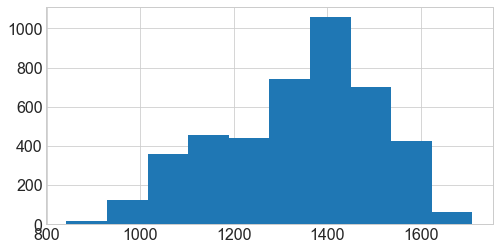

Column: Wind


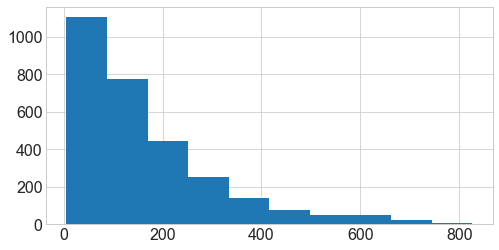

Column: Solar


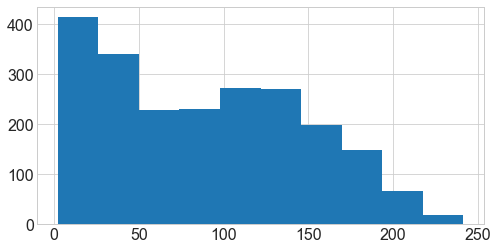

Column: Wind+Solar


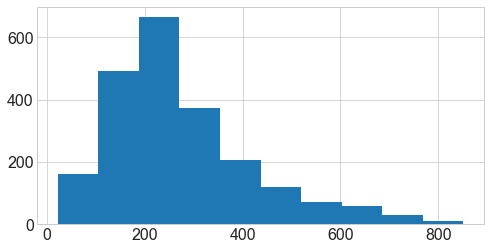

In [44]:
# Univariate analysis of variable distributions
for col in df.columns:
    print('Column: ' + col)
    plt.figure(figsize=(8,4))
    plt.hist(df[col])
    plt.show()

In [45]:
#Done above

In [47]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

### 3. Add a month and a year column to your dataframe.

In [48]:
#Adding month column
df['month'] = df.index.month_name()

In [50]:
df['year'] = df.index.year

In [51]:
df.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006


### 4. Fill any missing values.

In [54]:
df = df.fillna(0)

In [55]:
df.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006


### 5. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [14]:
def prepare_ops(df):
    # Reassign the date column to be a datetime type
    df.Date = pd.to_datetime(df.Date)
    # Set the index as that date and then sort index (by the date)
    df = df.set_index("Date").sort_index()
    #Adding month column
    df['month'] = df.index.month_name()
    #Adding Year Column
    df['year'] = df.index.year
    #Impute zeroes for missing values
    df = df.fillna(value=0)
    
    return df

In [4]:
#Taking it from prepare file
df = p.prepare_ops(df)

In [5]:
for col in list(df.columns):
    print(df[col].isna().sum())

0
0
0
0
0
0


In [11]:
df.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [12]:
df = df.fillna(value=0)

In [13]:
df.isnull().sum()

Date           0
Consumption    0
Wind           0
Solar          0
Wind+Solar     0
dtype: int64